<a href="https://colab.research.google.com/github/LucasColas/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from keras.datasets import mnist
from keras import models, layers, optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


(train_x, train_y), (test_x,test_y) = mnist.load_data()

In [11]:
train_x.shape

(60000, 28, 28)

In [12]:
train_y.shape

(60000,)

In [13]:
test_x.shape

(10000, 28, 28)

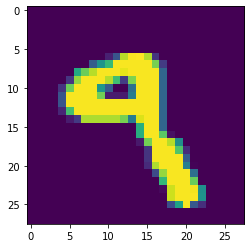

9


In [20]:
image = 424

plt.clf
plt.imshow(train_x[image])
plt.show()
print(train_y[image])

In [45]:
train_images = train_x.reshape((60000,28*28))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_x.reshape((10000, 28*28))
test_images = test_images.astype('float32')
test_images /= 255


In [23]:
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)


In [27]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

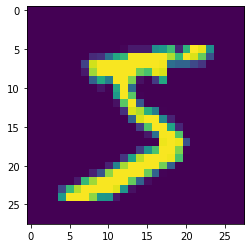

5


In [29]:
plt.clf()
plt.imshow(train_x[0])
plt.show()
print(train_y[0])

In [33]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['acc'])


In [37]:
history = model.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
469/469 [==============================] - 5s 10ms/step - loss: 0.0166 - acc: 0.9949
Epoch 2/4
469/469 [==============================] - 5s 10ms/step - loss: 0.0140 - acc: 0.9958
Epoch 3/4
469/469 [==============================] - 5s 10ms/step - loss: 0.0120 - acc: 0.9961
Epoch 4/4
469/469 [==============================] - 5s 10ms/step - loss: 0.0102 - acc: 0.9969


In [38]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0997 - acc: 0.9822


[0.09971734881401062, 0.982200026512146]

5


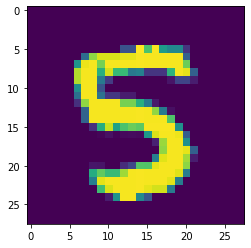

In [52]:
image = 120
print(np.argmax(model.predict(test_images[image].reshape(-1,28*28))))
plt.clf()
plt.imshow(test_x[image])
plt.show()
